In [58]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
import os
from data_functions import plot_data 
import pytrends
from pytrends.request import TrendReq

in terms of search volumes and not actual number of searches

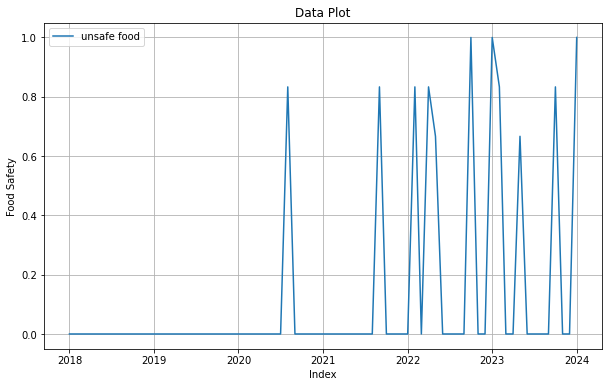

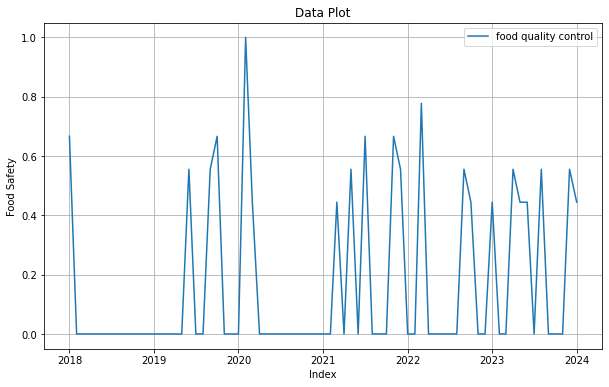

In [59]:
df2 = pd.DataFrame(pd.read_csv("/home/varsallz/cfprS24_z/cfpr_data_collection/data/raw_data/GT_food_safety.csv", encoding= 'unicode_escape')).dropna()
df2 = df2.rename(columns={"Category: All categories": "Date", "Unnamed: 1" : "unsafe food", "Unnamed: 2": "food quality control"})
df2 = df2.drop(df2.index[0])

df2['Date'] = pd.to_datetime(df2['Date'], format= "%b-%y")
df2 = df2.set_index('Date')

df2.replace('<1', 0.0001, inplace=True)

start_date = '2018-01-01'
end_date = '2024-01-01'
df2 = df2.loc[(df2.index >= start_date) & (df2.index <= end_date)]

scaler = MinMaxScaler(feature_range=(0, 1))
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)

plot_data(df2["unsafe food"], "Food Safety", legend_label=["unsafe food"])
plot_data(df2["food quality control"], "Food Safety", legend_label=["food quality control"])


/home/varsallz/.local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


<Axes: xlabel='date'>

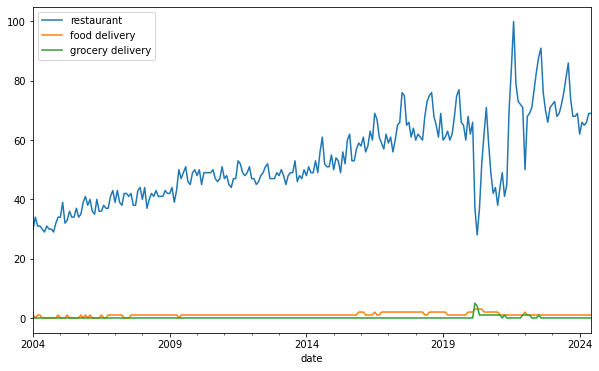

In [60]:
pytrend = TrendReq()
pt = TrendReq(hl="en-CA", tz=360)
list = ['restaurant', 'food delivery', 'grocery delivery']
list1 = ['unsafe food', 'food quality control']
list2 = ['avian flu', 'bird flu']
list3 = ['food bank', 'free food']
# list4 = ['healthy diet', 'junk food', 'organic food']
data = pt.build_payload(list, geo='CA', timeframe = "all")

iot = pt.interest_over_time()
iot.plot(figsize=(10,6))